# Predicting Usage of a Video Game Research Server

### Data Description<br>
"players.csv" dataset has 7 variables and 196 observations.
| variable | meaning | type
| -------- | ------- | ------- |
| experience | the player's game experience | factor
| subscribe | whether the player subscribe to a game-related newsletter | logical
| hashedEmail | hashed email | character
| played_hours | player's gaming time | double
| name | player's name | character
| gender | player's gender | factor
| Age | player's age | integer

"sessions.csv" dataset has 5 variables and 1535 pbservations.
| variable | meaning | type
| -------- | ------- | ------- |
| hashedEmail | hashed email | character
| start_time | start time of the session | date
| end_time | end time of the session | date
| original_start_time | original start time of the session | date
| original_end_time | original end time of the session | date

### Questions


Broad question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?</p>
Can experience,played_hours,gender and age predict subscribe in players.csv?

### Exploratory Data Analysis and Visualization

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
players_mean <- summarize(players,played_hours=mean(played_hours,na.rm = TRUE),
          Age=mean(Age,na.rm = TRUE))
players_mean

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


| quantitative variable | mean value |
| -------- | ------- |
| played_hours	 | 5.845918 |
| Age | 21.13918 |


`summarise()` has grouped output by 'subscribe'. You can override using the
`.groups` argument.


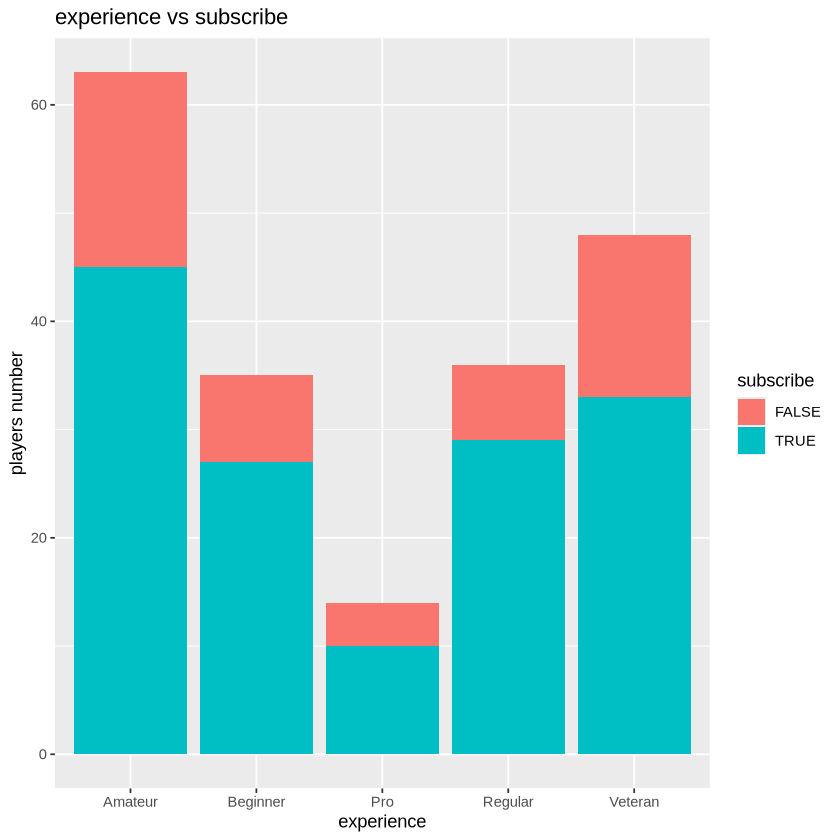

In [4]:
players1 <- group_by(players,subscribe,experience)|>
summarize(number=n())
ggplot(players1,aes(x=experience,y=number,fill=subscribe))+
       geom_bar(stat="identity")+
labs(x="experience",y="players number",fill="subscribe",
     title="experience vs subscribe")

From the plot above,we can view the number of players in each experience type and the subscription rate of each experience type.

`summarise()` has grouped output by 'subscribe'. You can override using the
`.groups` argument.


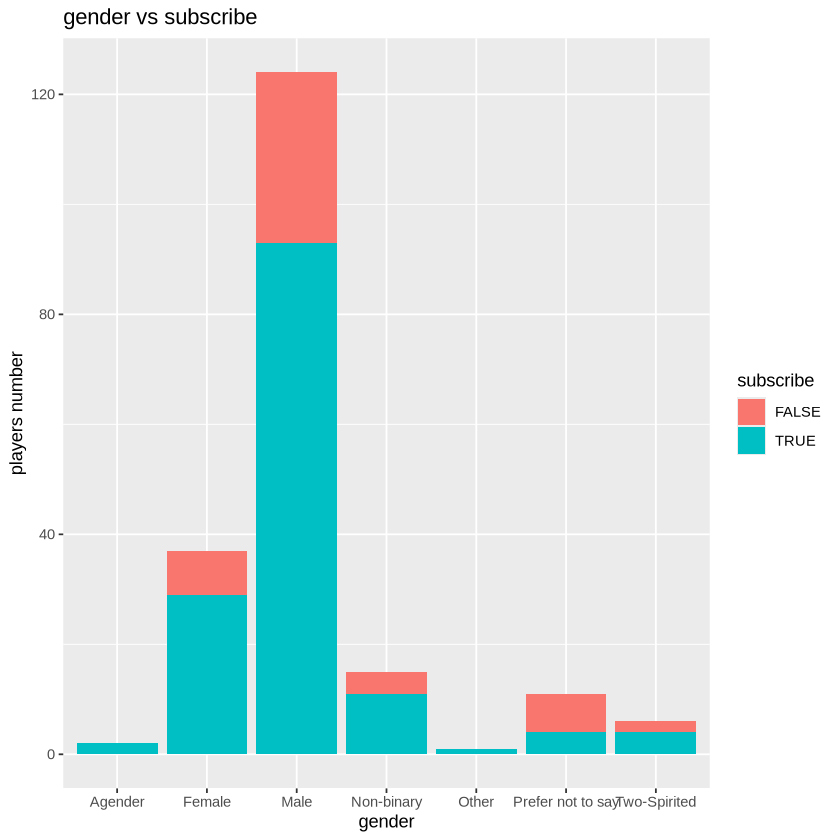

In [5]:
players2 <- group_by(players,subscribe,gender)|>
summarize(number=n())
ggplot(players2,aes(x=gender,y=number,fill=subscribe))+
       geom_bar(stat="identity")+
labs(x="gender",y="players number",fill="subscribe",
     title="gender vs subscribe")

From the plot above,we can view the number of players in each gender type and the subscription rate of each gender type.

### Methods and Plan

I use "players.csv".Because the question focus on player characteristics and subscribe.The "players.csv" dataset can provide related information.</p>
For played_hours and Age,then I can use Classification to build a model and compute the accuracy.
For experience and gender,I can use plots and compare the correlation between the variables from the plots.</p>
Since experience and gender aren't quantitative variables,I cannot determine the correlation between variables using calculations.I can only do so through observation.</p>
I will split the data into 2 parts,of which 70% is training data and 30% is testing data.

### GitHub Repository Link
https://github.com/yueran61/individual-planning-report.git